In [14]:
import gc
import json
import pandas as pd
import numpy as np
import seaborn as sns

from tqdm import tqdm_notebook
from glob import glob

from sklearn.decomposition import TruncatedSVD, NMF
from utils import loadpkl

%matplotlib inline

In [15]:
# load feathers
files = sorted(glob('../features/*.feather'))
df = pd.concat([pd.read_feather(f) for f in tqdm_notebook(files, mininterval=60)], axis=1)

# split train & test
train_df = df[df['click_mode'].notnull()]
test_df = df[df['click_mode'].isnull()]

/home/fujiwara/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/pandas/io/feather_format.py:124: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  nthreads=int_use_threads)
/home/fujiwara/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/pyarrow/pandas_compat.py:751: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [16]:
# load pkls
df = loadpkl('../features/plans.pkl')
queries = loadpkl('../features/queries.pkl')
profiles = loadpkl('../features/profiles.pkl')

In [3]:
# merge
df = pd.merge(df, queries, on='sid', how='left')
df = pd.merge(df, profiles, on='pid', how='left')

del queries, profiles
gc.collect()

train_df = df[df['click_mode'].notnull()]

In [16]:
feats_prof = [f for f in profiles.columns.to_list() if f not in ['pid']]
svd = TruncatedSVD(n_components=20, n_iter=20, random_state=2019)
svd.fit_transform(profiles[feats_prof].values)

array([[ 4.23600254e+03,  5.40932505e+00, -5.80920901e-01, ...,
         2.42769154e-02, -9.44008875e-02,  1.95654909e-03],
       [ 1.48920021e+04,  2.08473709e+00, -1.27411385e+00, ...,
        -2.64398589e-01, -9.53964372e-02, -4.57111015e-02],
       [ 1.48920021e+04,  2.15611720e+00, -1.18560199e+00, ...,
        -1.47757115e-01, -5.98817101e-02, -1.03755162e-01],
       ...,
       [ 2.75870014e+04, -2.05530430e+00,  7.98401476e-01, ...,
         9.05569589e-01, -6.20973589e-02, -1.27454748e-01],
       [ 1.48920021e+04,  2.13455634e+00, -1.07937522e+00, ...,
        -1.71953580e-01, -6.45253441e-02,  1.19827887e-03],
       [ 1.49050029e+04,  4.17349192e+00,  1.00635911e+00, ...,
        -1.04728279e-01, -8.55736671e-02, -1.10135317e-01]])

In [13]:
df

,sid,plan_0_distance,plan_1_distance,plan_2_distance,plan_3_distance,plan_4_distance,plan_5_distance,plan_6_distance,plan_0_price,plan_1_price,...,plan_hour_target_2,plan_hour_target_3,plan_hour_target_4,plan_hour_target_5,plan_hour_target_6,plan_hour_target_7,plan_hour_target_8,plan_hour_target_9,plan_hour_target_10,plan_hour_target_11
0,1709112,32303,33678.0,33678.0,32099.0,30446.0,NaN,NaN,600,0.0,...,0.276197,0.043586,0.022557,0.105985,0.025373,0.151758,0.003115,0.113025,0.027799,0.012282
1,3327773,3427,3251.0,3251.0,3227.0,3227.0,NaN,NaN,300,0.0,...,0.319105,0.055001,0.026794,0.114638,0.019996,0.173435,0.004238,0.035049,0.027324,0.005871
2,3285959,36234,29545.0,29545.0,33295.0,NaN,NaN,NaN,1100,0.0,...,0.275856,0.044210,0.020759,0.111356,0.027746,0.143598,0.003293,0.127563,0.026200,0.013658
3,1616170,11450,9100.0,10870.0,10870.0,11722.0,NaN,NaN,400,0.0,...,0.271326,0.043813,0.022734,0.113902,0.029092,0.142210,0.002584,0.122380,0.025231,0.013182
4,351369,18495,19111.0,19111.0,17117.0,NaN,NaN,NaN,600,0.0,...,0.319105,0.055001,0.026794,0.114638,0.019996,0.173435,0.004238,0.035049,0.027324,0.005871
5,749203,32486,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,...,0.288016,0.066100,0.026820,0.050588,0.014761,0.217663,0.004053,0.061646,0.033975,0.010158
6,3005789,4935,4434.0,4434.0,4228.0,3711.0,NaN,NaN,300,0.0,...,0.276197,0.043586,0.022557,0.105985,0.025373,0.151758,0.003115,0.113025,0.027799,0.012282
7,1897386,22103,18601.0,18601.0,24067.0,19733.0,NaN,NaN,500,0.0,...,0.285155,0.051575,0.021473,0.116690,0.028310,0.137101,0.002124,0.112608,0.025588,0.011483
8,845203,12422,12548.0,12548.0,12542.0,8641.0,13657.0,NaN,400,0.0,...,0.273808,0.037766,0.022430,0.113125,0.025072,0.147990,0.003073,0.115796,0.027111,0.013498
9,536341,2162,2647.0,2176.0,2647.0,2176.0,NaN,NaN,200,0.0,...,0.319105,0.055001,0.026794,0.114638,0.019996,0.173435,0.004238,0.035049,0.027324,0.005871


In [22]:
train_df.plans_0_transport_mode.map(train_df.groupby('plans_0_transport_mode').mean()['target_0'])

0         0.060405
1         0.046703
2         0.067123
3         0.046703
4         0.067123
5         0.127590
6         0.046703
7         0.046703
8         0.046703
9         0.092444
10        0.046703
11        0.046703
12        0.067123
13        0.091560
14        0.092444
15        0.067123
16        0.046703
17        0.127590
18        0.156717
19        0.046703
20        0.067123
21        0.046703
22        0.067123
23        0.060405
24        0.046703
25        0.091560
26        0.091560
27        0.091560
28        0.046703
29        0.046703
            ...   
491024    0.060405
491025    0.046703
491026    0.046703
491027    0.060405
491028    0.067123
491029    0.046703
491030    0.067123
491031    0.060405
491032    0.046703
491033    0.091560
491034    0.092444
491035    0.122996
491036    0.067123
491037    0.092444
491038    0.067123
491039    0.067123
491040    0.092444
491041    0.046703
491042    0.060405
491043    0.046703
491044    0.127590
491045    0.

/home/fujiwara/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


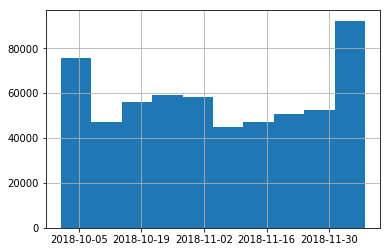

In [20]:
df.plan_time.sort_values().hist()